In [27]:
using ImageFeatures, TestImages, Images, ImageDraw, CoordinateTransformations

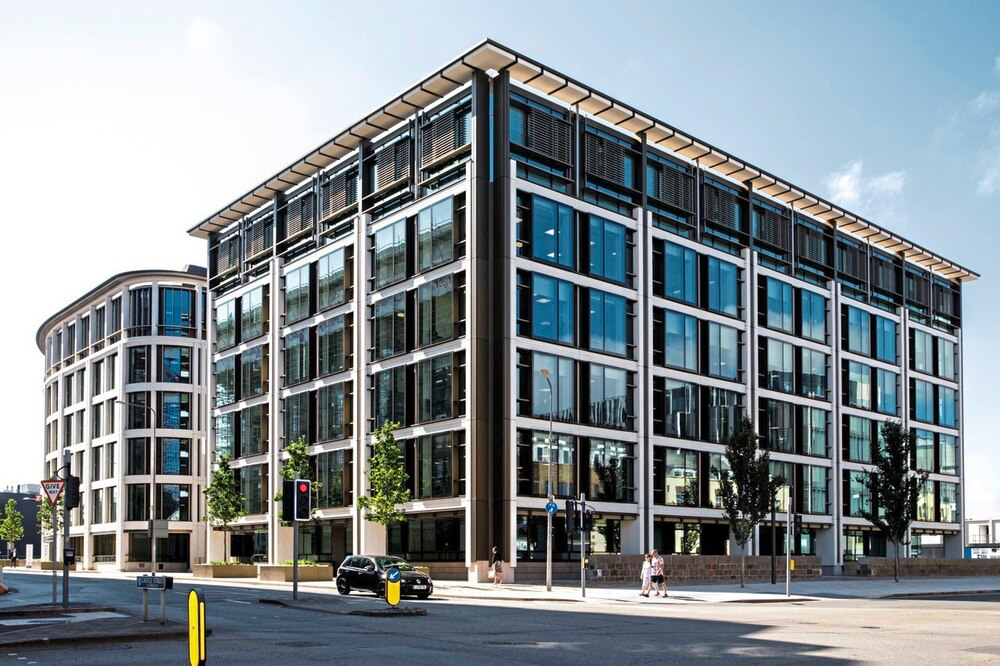

In [28]:
building = load("building.jpg")

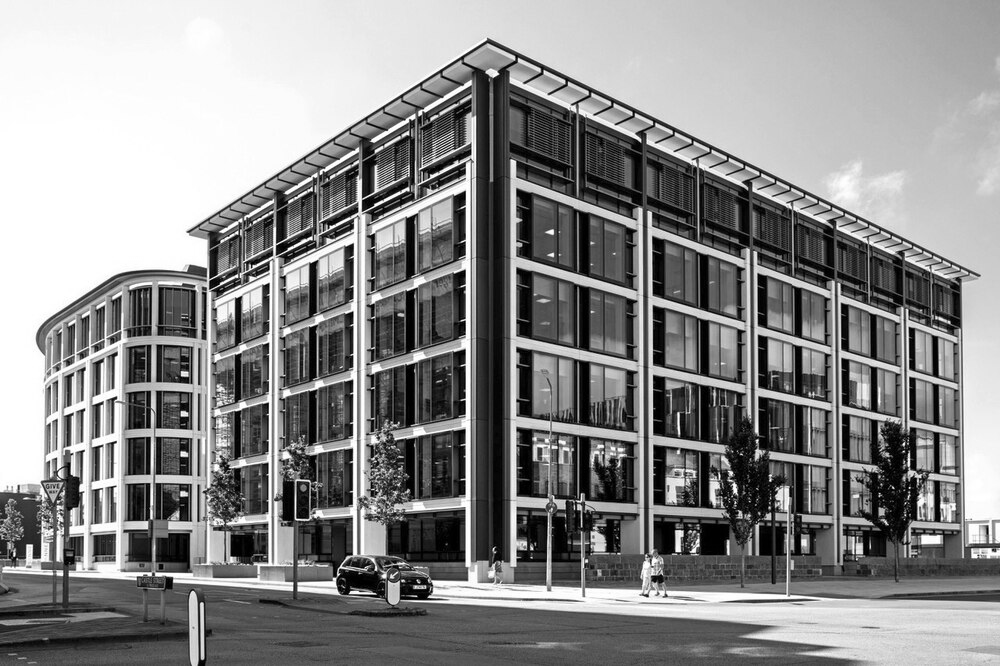

In [29]:
building_gray = Gray.(building)

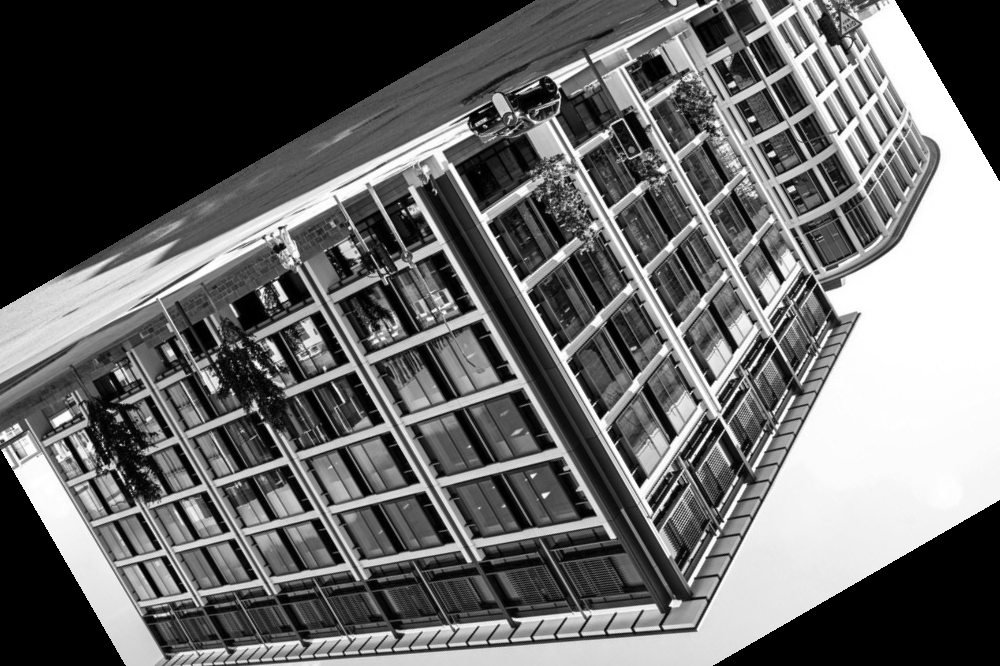

In [34]:
rot = recenter(RotMatrix(5pi/6), [size(building_gray)...] .÷ 2)  # a rotation around the center
tform = rot ∘ Translation(-50, -40)
img = warp(building_gray, tform, axes(building_gray))

In [35]:
features_1 = imcorner(building, method=harris);

In [36]:
summary(features_1)

"666×1000 Array{Bool,2}"

In [37]:
function draw_points(image::AbstractArray, mask::Keypoints; c::Colorant=colorant"yellow")
    new_image = copy(image)
    new_image[mask] = c
    return new_image
end

draw_points (generic function with 2 methods)

In [38]:
draw_points(building, features_1)

MethodError: MethodError: no method matching draw_points(::Array{RGBX{Normed{UInt8,8}},2}, ::Array{Bool,2})
Closest candidates are:
  draw_points(::AbstractArray, !Matched::BitArray{2}; c) at In[13]:2
  draw_points(::AbstractArray, !Matched::Array{CartesianIndex{2},1}; c) at In[37]:2

In [35]:
features_1 = Features(fastcorners(building_gray, 12, 0.35))
features_2 = Features(fastcorners(img, 12, 0.35))

9982-element Array{Feature,1}:
 Feature(CartesianIndex(383, 1), 0.0, 0.0)  
 Feature(CartesianIndex(382, 2), 0.0, 0.0)  
 Feature(CartesianIndex(383, 2), 0.0, 0.0)  
 Feature(CartesianIndex(451, 2), 0.0, 0.0)  
 Feature(CartesianIndex(382, 3), 0.0, 0.0)  
 Feature(CartesianIndex(450, 3), 0.0, 0.0)  
 Feature(CartesianIndex(451, 3), 0.0, 0.0)  
 Feature(CartesianIndex(452, 3), 0.0, 0.0)  
 Feature(CartesianIndex(450, 4), 0.0, 0.0)  
 Feature(CartesianIndex(452, 4), 0.0, 0.0)  
 Feature(CartesianIndex(450, 5), 0.0, 0.0)  
 Feature(CartesianIndex(441, 6), 0.0, 0.0)  
 Feature(CartesianIndex(442, 6), 0.0, 0.0)  
 ⋮                                          
 Feature(CartesianIndex(176, 913), 0.0, 0.0)
 Feature(CartesianIndex(177, 913), 0.0, 0.0)
 Feature(CartesianIndex(181, 913), 0.0, 0.0)
 Feature(CartesianIndex(177, 915), 0.0, 0.0)
 Feature(CartesianIndex(174, 916), 0.0, 0.0)
 Feature(CartesianIndex(175, 916), 0.0, 0.0)
 Feature(CartesianIndex(176, 916), 0.0, 0.0)
 Feature(CartesianIndex(

In [36]:
brisk_params = BRISK()

BRISK(0.25, 4, 1.0, Array{Tuple{Float16,Float16},1}[[(0.0, 0.0), (0.0, 2.465), (1.449, 1.994), (2.344, 0.7617), (2.344, -0.7617), (1.449, -1.994), (0.0, -2.465), (-1.449, -1.994), (-2.344, -0.7617), (-2.344, 0.7617)  …  (0.0, -9.18), (-2.836, -8.734), (-5.395, -7.426), (-7.426, -5.395), (-8.734, -2.836), (-9.18, -0.0), (-8.734, 2.836), (-7.426, 5.395), (-5.395, 7.426), (-2.836, 8.734)], [(0.0, 0.0), (0.01512, 2.465), (1.461, 1.985), (2.35, 0.7476), (2.34, -0.776), (1.437, -2.004), (-0.01512, -2.465), (-1.461, -1.985), (-2.35, -0.7476), (-2.34, 0.776)  …  (-0.05634, -9.18), (-2.89, -8.71), (-5.44, -7.395), (-7.46, -5.35), (-8.75, -2.783), (-9.18, 0.05634), (-8.71, 2.89), (-7.395, 5.44), (-5.35, 7.46), (-2.783, 8.75)], [(0.0, 0.0), (0.03024, 2.465), (1.474, 1.977), (2.354, 0.733), (2.334, -0.7905), (1.424, -2.012), (-0.03024, -2.465), (-1.474, -1.977), (-2.354, -0.733), (-2.334, 0.7905)  …  (-0.1127, -9.18), (-2.943, -8.695), (-5.49, -7.36), (-7.492, -5.305), (-8.766, -2.729), (-9.18, 0.

In [37]:
desc_1, ret_features_1 = create_descriptor(building_gray, features_1, brisk_params)
desc_2, ret_features_2 = create_descriptor(img, features_2, brisk_params)

(BitArray{1}[[0, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1  …  0, 1, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1  …  0, 1, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 1, 1, 0, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 1, 0, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 0, 1, 1, 0, 0, 1, 1], [0, 0, 1, 0, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  …  [0, 0, 1, 0, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 1, 0, 1, 1, 0  …  1, 1, 1, 1, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 1, 1, 0, 1, 1, 1  …  1, 1, 1, 1, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 1, 1, 0, 1, 1, 0  …  1, 1, 1, 1, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 0, 1, 1, 0  …  1, 1, 1, 1, 0, 1, 1, 1, 0, 0], [0, 0, 1,

In [38]:
matches = match_keypoints(Keypoints(ret_features_1), Keypoints(ret_features_2), desc_1, desc_2, 0.1)

1022-element Array{Array{CartesianIndex{2},1},1}:
 [CartesianIndex(381, 45), CartesianIndex(114, 910)] 
 [CartesianIndex(463, 49), CartesianIndex(78, 884)]  
 [CartesianIndex(497, 49), CartesianIndex(15, 848)]  
 [CartesianIndex(463, 50), CartesianIndex(45, 865)]  
 [CartesianIndex(315, 57), CartesianIndex(196, 923)] 
 [CartesianIndex(420, 57), CartesianIndex(86, 880)]  
 [CartesianIndex(421, 57), CartesianIndex(85, 880)]  
 [CartesianIndex(371, 58), CartesianIndex(129, 904)] 
 [CartesianIndex(313, 60), CartesianIndex(188, 927)] 
 [CartesianIndex(494, 64), CartesianIndex(26, 837)]  
 [CartesianIndex(493, 65), CartesianIndex(27, 837)]  
 [CartesianIndex(415, 66), CartesianIndex(95, 875)]  
 [CartesianIndex(324, 72), CartesianIndex(177, 915)] 
 ⋮                                                   
 [CartesianIndex(461, 890), CartesianIndex(467, 138)]
 [CartesianIndex(445, 903), CartesianIndex(488, 135)]
 [CartesianIndex(479, 904), CartesianIndex(459, 117)]
 [CartesianIndex(462, 905), Cart

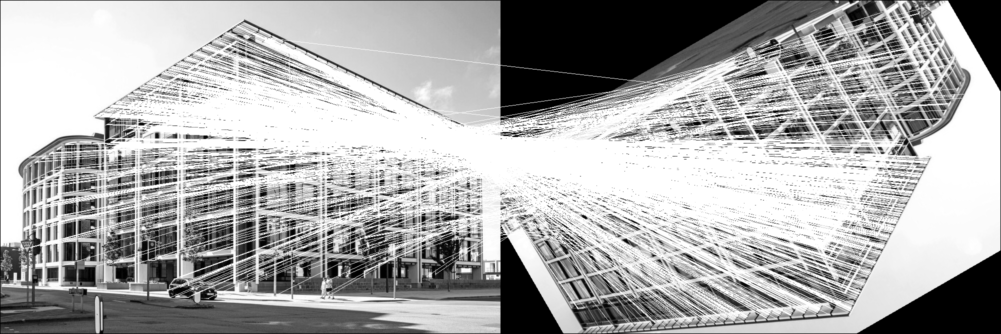

In [39]:
grid = hcat(building_gray, img)
offset = CartesianIndex(0, size(building_gray, 2))
building_key = map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches)[1]

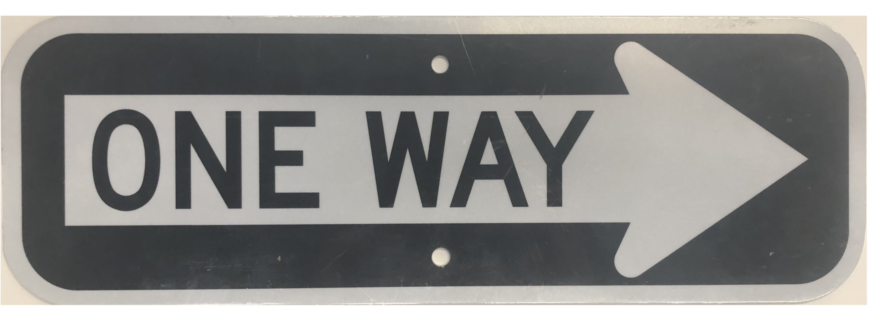

In [5]:
img = load("one_way.png")